
# Classificação de Imagens com Rede Neural Simples

Neste notebook, vamos aplicar uma **Rede Neural Artificial** para uma tarefa **real de classificação de imagens**.  
Esse é um exemplo prático que conecta diretamente ao **Vídeo teórico visto anteriormente: Redes Neurais: Da Inspiração Biológica à Revolução da IA**.

Aqui, usaremos o famoso dataset **MNIST**, que contém imagens de dígitos escritos à mão (0 a 9).  

Nosso objetivo será treinar uma rede neural para reconhecer corretamente cada dígito.


## 1. Importando bibliotecas

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


## 2. Carregando e explorando o dataset MNIST

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Formato do treino: (60000, 28, 28)
Formato do teste: (10000, 28, 28)


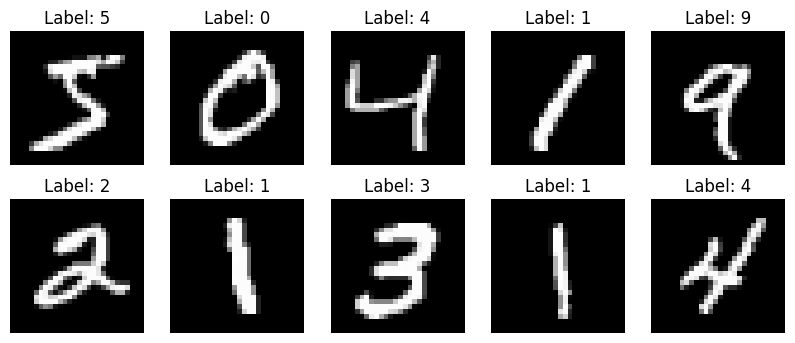

In [2]:

# Carregar dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Formato do treino:", x_train.shape)
print("Formato do teste:", x_test.shape)

# Mostrar alguns exemplos
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


## 3. Pré-processamento dos dados

In [3]:

# Normalizar pixels (0-255 -> 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten: transformar 28x28 -> vetor 784
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

print("Novo formato treino:", x_train.shape)


Novo formato treino: (60000, 784)


## 4. Criando a rede neural

In [4]:

model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),  # camada oculta
    layers.Dense(64, activation="relu"),                       # outra camada oculta
    layers.Dense(10, activation="softmax")                     # saída (10 classes)
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Treinando o modelo

In [5]:

history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    epochs=5,
                    batch_size=32)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8730 - loss: 0.4346 - val_accuracy: 0.9680 - val_loss: 0.1115
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9664 - loss: 0.1105 - val_accuracy: 0.9698 - val_loss: 0.1027
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9779 - loss: 0.0713 - val_accuracy: 0.9753 - val_loss: 0.0902
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9825 - loss: 0.0549 - val_accuracy: 0.9768 - val_loss: 0.0822
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9865 - loss: 0.0418 - val_accuracy: 0.9775 - val_loss: 0.0799


## 6. Avaliando no conjunto de teste

In [6]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Acurácia no teste: {test_acc*100:.2f}%")


313/313 - 1s - 2ms/step - accuracy: 0.9766 - loss: 0.0823
Acurácia no teste: 97.66%


## 7. Fazendo previsões em novas imagens

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


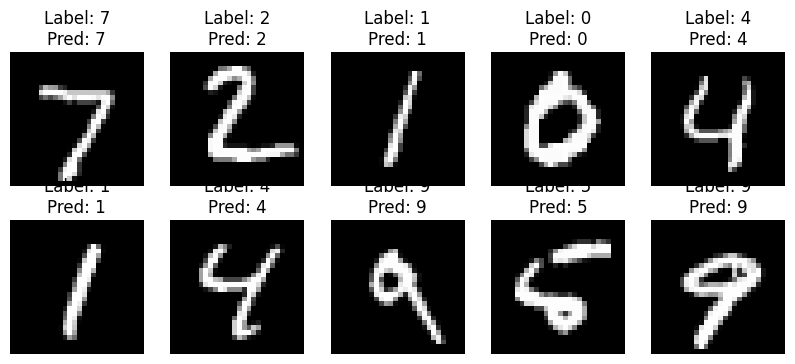

In [9]:

predictions = model.predict(x_test[:10])

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"Label: {y_test[i]}\nPred: {np.argmax(predictions[i])}")
    plt.axis("off")
plt.show()



## 8. Conexão com a teoria

- No **Vídeo teórico** vimos *por que* redes neurais são inspiradas no cérebro e como elas revolucionaram a IA.  
- Aqui vimos isso na prática: uma rede simples foi capaz de **aprender a reconhecer dígitos** sem que tivéssemos que programar regras manualmente.  
- Esse mesmo princípio pode ser usado em problemas de visão computacional, reconhecimento de voz, processamento de linguagem natural e muito mais.
